In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import tensorflow as tf

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

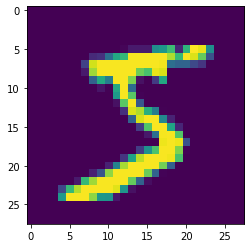

In [9]:
plt.imshow(X_train[0])

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
only_zeros = X_train[y_train==0]

In [17]:
only_zeros.shape

(5923, 28, 28)

In [18]:
X_train.shape

(60000, 28, 28)

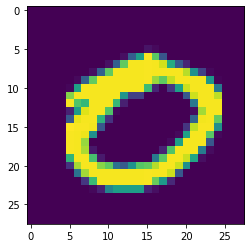

In [22]:
plt.imshow(only_zeros[14])

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [31]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape= [28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

# Final output layer
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss="binary_crossentropy", optimizer="adam")



In [34]:
coding_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape= [coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [36]:
GAN = Sequential([generator, discriminator])

In [37]:
discriminator.trainable = False

In [38]:
GAN.compile(loss="binary_crossentropy", optimizer='adam')

In [41]:
batch_size = 100

In [42]:
my_data = only_zeros

In [44]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [45]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [46]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [47]:
epochs =1

In [48]:
GAN.layers

In [50]:
GAN.layers[0].layers

In [51]:
GAN.layers[1].layers

In [53]:
GAN.layers[0].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_18 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [54]:
GAN.layers[1].summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [61]:
generator , discriminator = GAN.layers

for epoch in range(epochs):
    print(f"current on epoch {epoch+1}")
    i = 0
    
    
    for X_batch in dataset:
        i = i+1
        if i%100 == 0:
            print(f"\t currently on batch no {i} of {len(my_data)}//batch_size" )
            
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        gen_images = generator(noise)
        x_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1]]*batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(x_fake_vs_real, y1)
        
        noise = tf.random.normal(shape=[batch_size, coding_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)

current on epoch 1


In [63]:
noise = tf.random.normal(shape=[10, coding_size])

In [65]:
noise.shape

TensorShape([10, 100])

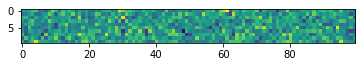

In [66]:
plt.imshow(noise)

In [67]:
images = generator(noise)

In [68]:
images.shape

TensorShape([10, 28, 28])

In [69]:
images[0]

<tf.Tensor: id=7572, shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06245542, 0.        , 0. 

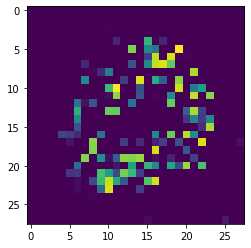

In [70]:
plt.imshow(images[0])

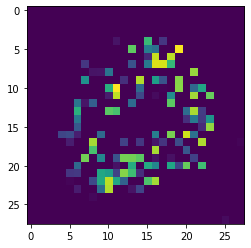

In [72]:
plt.imshow(images[1])